# Heart Disease Prediction

**This notebook looks into various Python-based machine learning and data science libraries in an attempt to build a machine learning model that classifies patients based on whether they have heart disease or not**

## Workflow

![](./images/6-step-ml-framework.png)

## 1. Problem definition

> Given clinical paraameters about a patient, predict whether or not they have heart disease.

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you get different information about each of the features in your data.

**Create data dictionary**

1. age - in years

2. sex - 1 = male; 0 = female

3. cp - chest pain type
    * Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)

5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern

6. fbs - (fasting blood sugar > 120 mg/dl) (1: True; 0: False)
    * '>126' mg/dL signals diabetes

7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber

8. thalach - maximum heart rate achieved

9. exang - exercise induced angina (1 = yes; 0 = no)

10. oldpeak - ST depression induced by exercise relative to rest

11. slope - the slope of the peak exercise ST segment
    * 0:  Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart

12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)

13. thal - 
    * 1,3 = normal 
    * 6 = fixed defect 
    * 7 = reversable defect

14. target - 1 for heart disease and 0 for no heart disease

## Preparing the tools

Tools used for dat aanalysis and manipulation:
1. Pandas
2. NumPy
3. Matplotlib

# Standard Library imports

In [1]:
# Regluar EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to make sure our plots appear inside the notebook
%matplotlib inline 

# Import Sklearn Models Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation Metrics Libraries
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

# Model Improvement Libraries
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# 2. Data Exploration (Data, Evaluation and Features)

What we did in the Pandas NumPy and Matplotlib sections

## 2.1 Load the Data (heart-disease dataset)

In [2]:
df = pd.read_csv('data/heart-disease.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
df.shape, df.ndim, df.size

((303, 14), 2, 4242)

## 2.2 Data Exploration (Exploratory Data Analysis or EDA)

**The Goal is to find out more about the data and becme a subject matter expert on the dataset**

1. What problem(s) are we trying to solve?
2. What kind of data do we have and how to handle the different types?
3. What is missing from the data and how to deal with it?
4. Where are the outliers and what to do with them?
5. How can you add, change or remove features to get better results from the data


In [4]:
df.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

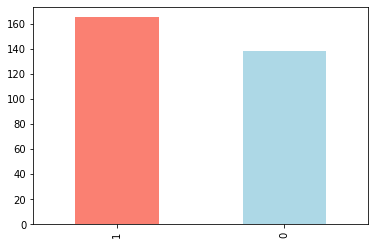

In [6]:
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 2.2.1 Finding patterns in the data

#### Heart Disease Frequency according to Sex

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


# 3. Evaluation of Success


**logical conclusion (as per in data set):**
1. 75% of the women have heart disease.
2. 45% of the men have heart disease.
3. Approx. 60% percent of the people will have heart disease

**With the baseline as 60%, we will try to beat this accuracy with the baseline model.**

**Then we will try and imrove it to 95% (based on our evaluation of success)**

# 4. Exploring the Features of our Data

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

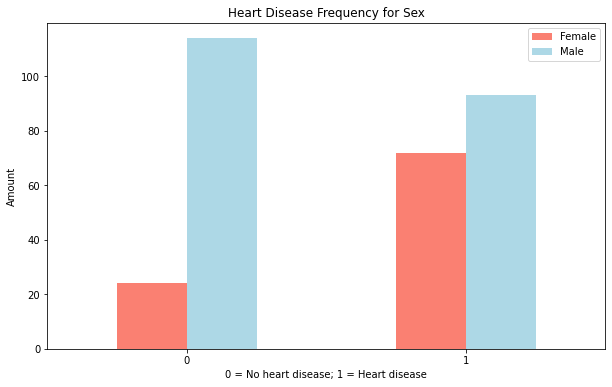

In [12]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                    color=['salmon', 'lightblue'],
                                    figsize = (10,6))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = No heart disease; 1 = Heart disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0)

In [13]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [14]:
df['thalach'].value_counts()

162    11
163     9
160     9
152     8
173     8
       ..
128     1
129     1
134     1
137     1
202     1
Name: thalach, Length: 91, dtype: int64

#### Age vs. Max Heart Rate for Heart Disease

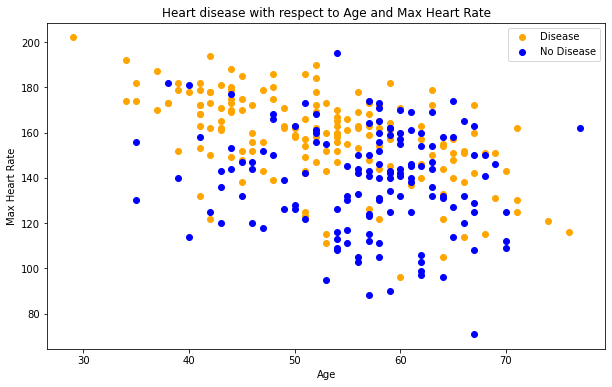

In [15]:
plt.figure(figsize=(10, 6))

# Scatter positive examples
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            color='orange')

# Scatter with negative examples
plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            c='blue')

plt.title('Heart disease with respect to Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease']);

# The blue ones are generally lower than the orange ones, showing that higher heart rate and age = heart disease

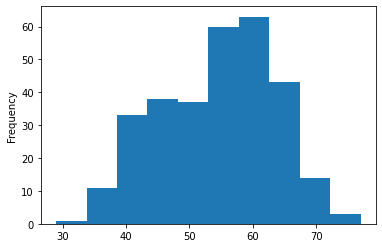

In [16]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

# Older ppl (50 - 60) are a majority
# young ppl (30 - 40) and very old (70+) are outliers

In [17]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

#### Chest Pain type and Heart Disease
3. cp - chest pain type
    * Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

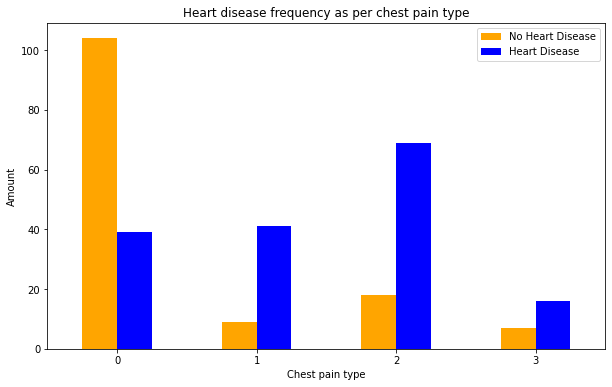

In [18]:
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                   figsize=(10, 6),
                                   color=['orange', 'blue']);
plt.title('Heart disease frequency as per chest pain type')
plt.xlabel('Chest pain type')
plt.ylabel('Amount')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.xticks(rotation=0);

**basically, high cp of type 1, 2, 3 are  indications of heart disease (usually). And type 0 is not related to heart disease, or so it looks.**

**As per descriptions of the types of pain, it is supposed to be the other way round**

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
#### Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


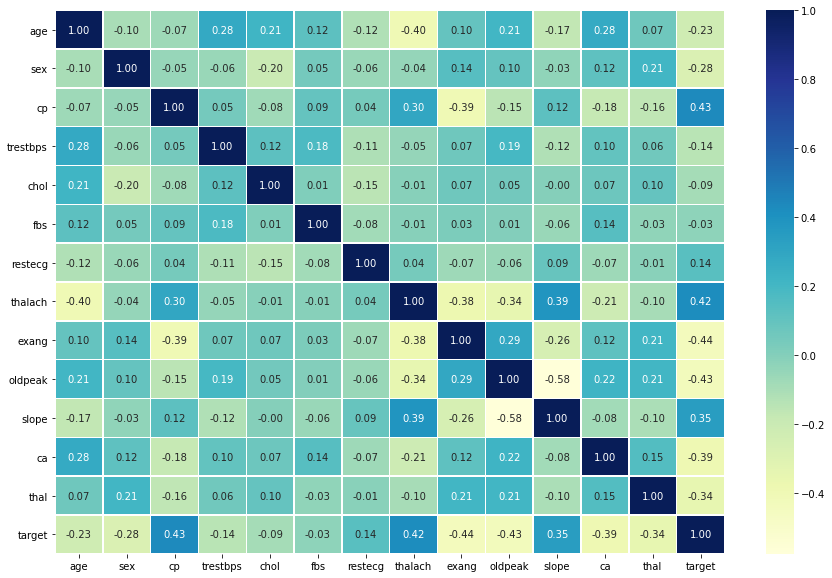

In [21]:
# Let's make it more visual
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap='YlGnBu');

**positive value direct proportion; negative value inverse proportion. Thalach and age has an inverse proportion as thalach decrease with increasing age and so on.**

**So, we can get to know that increasing thalach means increasing chest pain type.**

**Type 0:- Low Thalach; Type 1- High Thalach; Type 2 - Higher Thalach; Type 3- Comparively high (w.r.t no heart disease)**

**1 signifies 100% correlation. That is why age and age = 1 and so on.**

We could do this for every column until we ourseves are able to predict the output, but the computer can do this quicker.

# 5. Modelling (Training Machines to find patterns)

This is what we have done in the scikit learn section

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 5.1 Splitting The Data

### 5.1.1 Splitting The Data into X and y

In [23]:
X = df.drop('target', axis=1)
y = df['target']

X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [24]:
y.value_counts()

1    165
0    138
Name: target, dtype: int64

### 5.1.2 Splitting X and y into Train and test datasets

In [25]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [26]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


## 5.2 Choosing a model for the problem

![](./images/sklearn-algorithm-map.png)

**So, according to the map, We can use:** 
1. LinearSVC 
2. KNeighborsClassifier 
3. RandomForestClassifier
4. LogisticRegression(not in the map)
5. SVC(not used)

**We will be using:**
1. KNeighborsClassifier 
2. RandomForestClassifier
3. LogisticRegression 

In [27]:
models = {'Logistic Regression': LogisticRegression(),
          'K-Nearest Neighbors Classifier': KNeighborsClassifier(),
          'Random Forest Classifier': RandomForestClassifier()}

def fit_and_score_models(models, X_train, X_test, y_train, y_test):
    '''
    Fits the training dat on the model and scores them on test data
    models: A dictionary of Scikit-learn models
    X_train: Training feature variables
    X_test: Testing feature variables
    y_train : Training labels
    y_test : Testing labels
    '''
    # Set random seed
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    model_scores = {}
    
    # Loop through the models
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train, y_train)
        
        # Score the model and append it to the model_scores dict
        model_scores[name] = model.score(X_test, y_test)
    
    for name, score in model_scores.items():
        print(f'{name} model scored {score * 100:.2f}% on test dataset.\n')
    
    return model_scores

model_scores = fit_and_score_models(models, X_train, X_test, y_train, y_test)
model_scores

C:\Users\abc\OneDrive\Desktop\ml_course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression model scored 88.52% on test dataset.

K-Nearest Neighbors Classifier model scored 68.85% on test dataset.

Random Forest Classifier model scored 83.61% on test dataset.



{'Logistic Regression': 0.8852459016393442,
 'K-Nearest Neighbors Classifier': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918}

## 5.3 Model Comparision

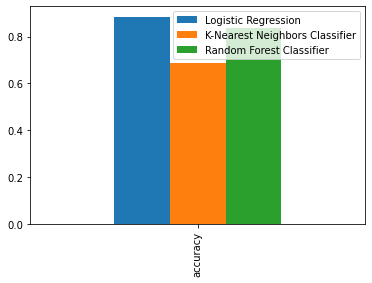

In [28]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.plot(kind='bar');

In [29]:
model_compare.shape

(1, 3)

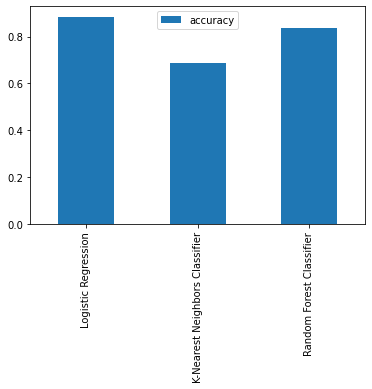

In [30]:
# The shape needs to be (3, 1) so, transpose the df
model_compare.T.plot(kind='bar');

These are baseline models

What we are to do:
* Hyperparameter Tuning 
* Feature Importance
* Confusion Matrix
* Cross-validation
* Precision
* Recall
* F1 Score
* Classification Report
* ROC Curve
* Area Under the Curve (AUC)

## 5.4 Hyperparameter Tuning

### Improving KNN (By hand)

In [31]:
train_score = []
test_score = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# loop through the n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=1)
    knn.fit(X_train, y_train)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

In [32]:
train_score

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [33]:
test_score

[0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312,
 0.6229508196721312]

In [34]:
max(test_score)

0.6229508196721312

no effect

Max score: 62.30% Horrible


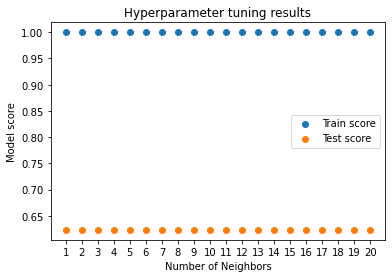

In [35]:
plt.scatter(neighbors, train_score, label='Train score')
plt.scatter(neighbors, test_score, label='Test score')

plt.title('Hyperparameter tuning results')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Number of Neighbors')
plt.ylabel('Model score')
plt.legend();

print(f'Max score: {max(test_score) * 100:.2f}% Horrible')

KNN is ditched

bye bye

### Improving Using RandomizedSearchCV

we are going to tune:
* LogisticRegression()
* RandomFrestClassifier()

In [36]:
# Create a hyperparameter list for LogisticRegression()
lr_grid = {'C': np.logspace(-4, 4, 20),
           'solver': ['liblinear']}

# Create a hyperparameter list for RandomFrestClassifier()
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}

In [37]:
np.random.seed(42)

rs_lr = RandomizedSearchCV(LogisticRegression(),
                            param_distributions=lr_grid,
                            n_iter=20,
                            cv=5,
                            verbose=True)


rs_lr.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [38]:
rs_lr.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [39]:
rs_lr.score(X_test, y_test)

0.8852459016393442

no improvement

In [40]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions=rf_grid,
                            n_iter=20,
                            cv=5,
                            verbose=True)
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [41]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [42]:
rs_rf.score(X_test, y_test)

0.8688524590163934

Improved, but LogisticRegressor is in the lead by 2%

### Using GridSearchCV to improve LogisticRegression

In [43]:
grid = {'C': np.logspace(-4, 4, 30),
           'solver': ['liblinear']}

gs_lr = GridSearchCV(LogisticRegression(),
                     param_grid=grid,
                     cv=5,
                     verbose=2)

# Fit the model
gs_lr.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0003562247890262444, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0003562247890262444, sol

[CV] END ..............C=32.90344562312671, solver=liblinear; total time=   0.0s
[CV] END ..............C=32.90344562312671, solver=liblinear; total time=   0.0s
[CV] END ..............C=32.90344562312671, solver=liblinear; total time=   0.0s
[CV] END ..............C=32.90344562312671, solver=liblinear; total time=   0.0s
[CV] END ..............C=62.10169418915616, solver=liblinear; total time=   0.0s
[CV] END ..............C=62.10169418915616, solver=liblinear; total time=   0.0s
[CV] END ..............C=62.10169418915616, solver=liblinear; total time=   0.0s
[CV] END ..............C=62.10169418915616, solver=liblinear; total time=   0.0s
[CV] END ..............C=62.10169418915616, solver=liblinear; total time=   0.0s
[CV] END .............C=117.21022975334793, solver=liblinear; total time=   0.0s
[CV] END .............C=117.21022975334793, solver=liblinear; total time=   0.0s
[CV] END .............C=117.21022975334793, solver=liblinear; total time=   0.0s
[CV] END .............C=117.

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=2)

In [44]:
gs_lr.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [45]:
gs_lr.score(X_test, y_test)

0.8852459016393442

the baseline model itself was at its best! Wierd

## 5.5 Evaluation

* Confusion Matrix
* Cross-validation
* Precision
* Recall
* F1 Score
* Classification Report
* ROC Curve
* Area Under the Curve (AUC)

In [47]:
y_preds = gs_lr.predict(X_test)

In [48]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

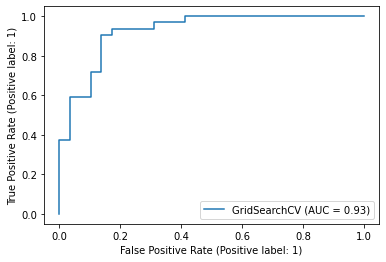

In [55]:
plot_roc_curve(gs_lr, X_test, y_test);

In [59]:
confusion_matrix(y_test, y_preds)

array([[25,  3],
       [ 4, 29]], dtype=int64)

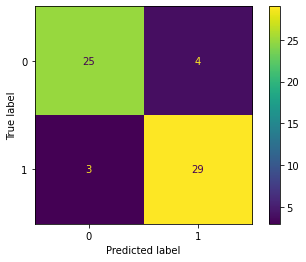

In [69]:
plot_confusion_matrix(gs_lr, X_test, y_test);

In [65]:
 classification_report= classification_report(y_test, y_preds)
print(classification_report)

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [73]:
gs_lr.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [74]:
clf = LogisticRegression(C=0.20433597178569418,
                        solver='liblinear')

In [75]:
# cross-validated accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
cv_acc.mean()

0.8446994535519124

In [76]:
# cross-validated precision
cv_prec = cross_val_score(clf, X, y, cv=5, scoring='precision')
cv_prec.mean()

0.8207936507936507

In [77]:
# cross-validated recall
cv_rec = cross_val_score(clf, X, y, cv=5, scoring='recall')
cv_rec.mean()

0.9212121212121213

In [79]:
# cross-validated f1 score
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring='f1')
cv_f1.mean()

0.8673007976269721

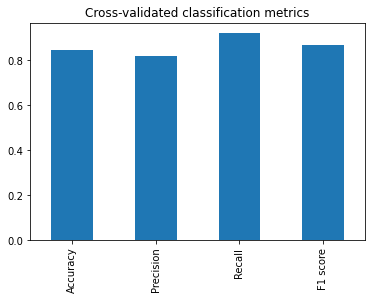

In [85]:
# Visualize the cv metrics

cv_metrics = pd.DataFrame({'Accuracy': cv_acc.mean(),
                           'Precision': cv_prec.mean(),
                           'Recall': cv_rec.mean(),
                           'F1 score': cv_f1.mean(),},
                          index=[0])
cv_metrics.T.plot.bar(title='Cross-validated classification metrics',
                      legend= False);

## 5.6 Feature Importance

feature importance is finding which features contributed most to the outcomes of the model and how they contributed

Finding feature importance is different for each model

In [86]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [88]:
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [89]:
# Check for coef
clf.coef_

array([[ 0.00316728, -0.86044655,  0.66067042, -0.01156993, -0.00166374,
         0.04386109,  0.31275847,  0.02459361, -0.60413083, -0.56862804,
         0.4505163 , -0.63609898, -0.67663378]])

In [91]:
len(clf.coef_)

1

In [92]:
# match the coef's features to columns
feature_dict =dict(zip(df.columns, list(clf.coef_[0]))) 
feature_dict

{'age': 0.0031672809701328098,
 'sex': -0.8604465542018854,
 'cp': 0.6606704161071124,
 'trestbps': -0.011569931839584581,
 'chol': -0.0016637442846940298,
 'fbs': 0.043861090099753856,
 'restecg': 0.3127584688139112,
 'thalach': 0.024593614036076978,
 'exang': -0.6041308274033194,
 'oldpeak': -0.5686280446250761,
 'slope': 0.45051629703183155,
 'ca': -0.6360989766185763,
 'thal': -0.6766337834775279}

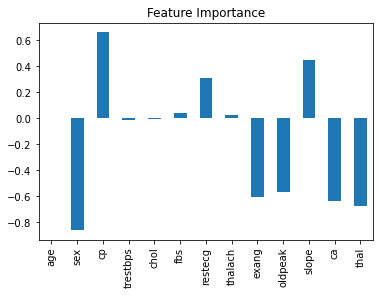

In [94]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])

feature_df.T.plot.bar(title='Feature Importance', legend=False);

In [95]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


the ratio decreases with increasing sex

24:72 = 3:9 = 1:3

114: 93 = approx. 1:2

In [96]:
pd.crosstab(df['slope'], df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


11. slope - the slope of the peak exercise ST segment
    * 0:  Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart

according to both of these, Increasing slope, increasing target

**Chest pain has high Importance, both logically and according to the code**

**Max heart rate, chol, low importance**

**Sex, exang and the others are**

# 6. Experimentation

try:-
* collecting more data
* try a better model (CatBoost or XGBoost)
* Try changing hyperparameters
* modify data (Correlation analysis)

In [98]:
from joblib import dump, load

dump(clf, filename='./Heart-disease-model.joblib')

['./Heart-disease-model.joblib']

#### So far, we have done the basic.



**Try more models, hyperparameters and other things**